# LGMVIP July Data Science Internship Task 07 

## Data Science Intern | BEGINNER LEVEL TASL 07 | Name: Sloveni Nayak 

## A Neural Network That Can Read Handwriting ML Project

## Step 1: Importing Libraries

In [1]:
#Import Libraries
import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt

## Step 2: Loading Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

## Step 3: Displaying Some Images From Dataset

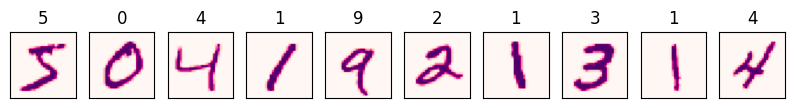

In [31]:
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='RdPu')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [7]:
print('SHAPE OF TRAINING IMAGES = ',x_train.shape)
print('SHAPE OF TESTING IMAGES = ',x_test.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

SHAPE OF TRAINING IMAGES =  (60000, 28, 28, 1)
SHAPE OF TESTING IMAGES =  (10000, 28, 28, 1)


## Step 4: Applying Normalization To Dataset

In [8]:
#Each pixel is represented by a value between 0 and 255 
#Indicating the intensity of the pixel.
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## Step 5: Built a Model Using Layers

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

## Step 6: Training The Model

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 874s 512ms/step - loss: 0.2970 - accuracy: 0.9121 - val_loss: 0.0896 - val_accuracy: 0.9767
Epoch 2/10
1688/1688 [==============================] - 883s 523ms/step - loss: 0.1213 - accuracy: 0.9644 - val_loss: 0.0810 - val_accuracy: 0.9847
Epoch 3/10
1688/1688 [==============================] - 858s 508ms/step - loss: 0.0970 - accuracy: 0.9729 - val_loss: 0.0749 - val_accuracy: 0.9867
Epoch 4/10
1688/1688 [==============================] - 888s 526ms/step - loss: 0.0821 - accuracy: 0.9765 - val_loss: 0.1048 - val_accuracy: 0.9845
Epoch 5/10
1688/1688 [==============================] - 1002s 594ms/step - loss: 0.0693 - accuracy: 0.9795 - val_loss: 0.0986 - val_accuracy: 0.9835
Epoch 6/10
1688/1688 [==============================] - 1605s 951ms/step - loss: 0.0632 - accuracy: 0.9822 - val_loss: 0.1169 - val_accuracy: 0.9813
Epoch 7/10
1688/1688 [==============================] - 970s 575ms/step - loss: 0.0543 - accuracy: 0.9841 - va

## Step 8: Saving The Model

In [19]:
model.save('MLProject.h5')

In [20]:
from tensorflow.keras.models import load_model
model = load_model('MlProject.h5')

## Step 9: Model Evaluation

In [22]:
loss_and_acc=model.evaluate(x_test,y_test)
print("LOSS OF TEST = ", loss_and_acc[0])
print("ACCURACY OF THE TEST = ", loss_and_acc[1])

313/313 [==============================] - 14s 45ms/step - loss: 3.0840 - accuracy: 0.9890
LOSS OF TEST =  3.0840084552764893
ACCURACY OF THE TEST =  0.9890000224113464


## Step 10: Plotting Graphs | Training & Validation

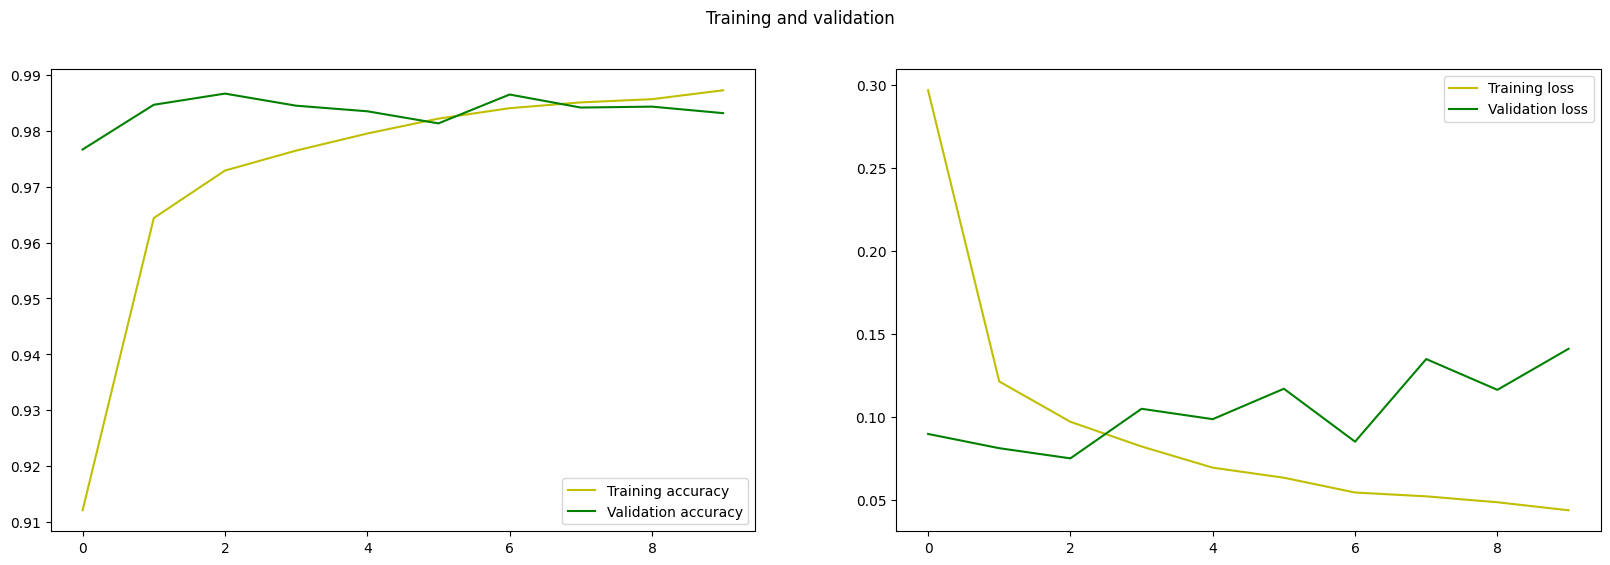

In [23]:
acc = history.history['accuracy']
valu_acc = history.history['val_accuracy']
loss = history.history['loss']
valu_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, valu_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, valu_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

## Step 11: Applying Confusion Matix

In [24]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 15s 46ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    2,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1128,    2,    2,    0,    0,    1,    2,    0,    0],
       [   0,    2, 1024,    2,    1,    0,    0,    3,    0,    0],
       [   0,    0,    1, 1007,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    2,  978,    0,    1,    0,    0,    1],
       [   0,    0,    1,    8,    0,  881,    1,    1,    0,    0],
       [   3,    2,    0,    1,    2,    7,  941,    0,    2,    0],
       [   0,    0,    9,    2,    0,    1,    0, 1015,    1,    0],
       [   2,    1,    3,    4,    2,    0,    0,    2,  958,    2],
       [   0,    0,    0,   11,    7,    4,    0,    1,    1,  985]])>

## Step 12: Plotting Graphs For Truth Prediction | Heat Map

Text(95.72222222222221, 0.5, 'Truth')

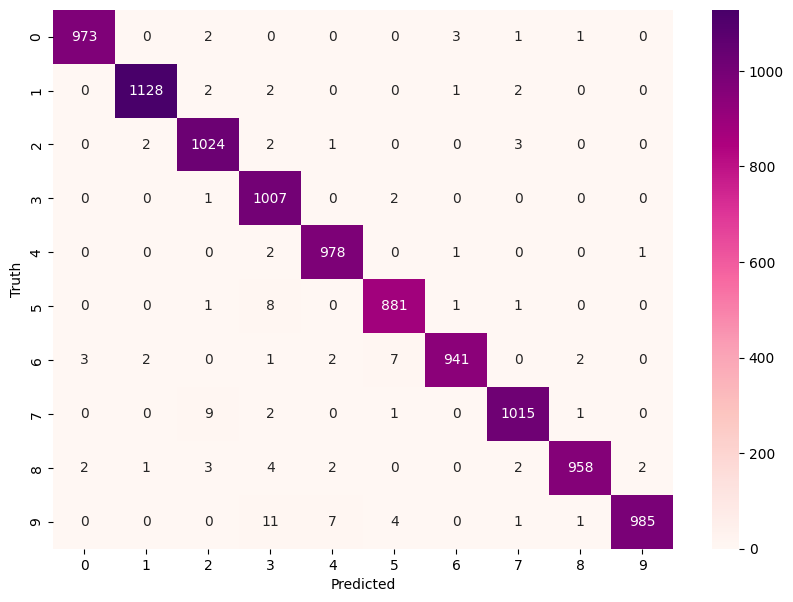

In [26]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'RdPu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Step 13: Check The Model For Successful Prediction

313/313 [==============================] - 14s 46ms/step
Predicted Value:  9
SUCCESSFUL PREDICTION = 


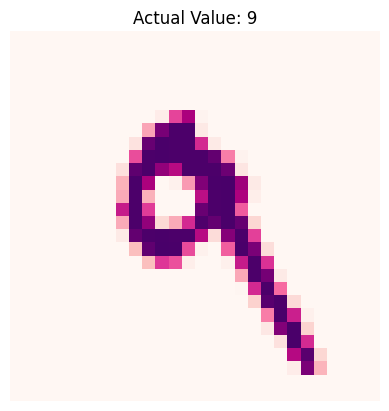

In [28]:
plt.imshow(x_test[7],cmap='RdPu')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('SUCCESSFUL PREDICTION = ')
else:
  print('UNSUCCESSFUL PREDICTION SEEN')

313/313 [==============================] - 14s 45ms/step
Predicted Value:  1
Successful prediction


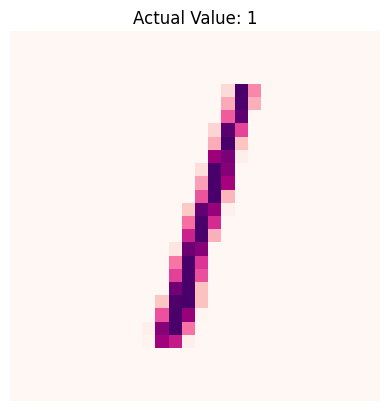

In [35]:
plt.imshow(x_test[2],cmap='RdPu')
plt.title('Actual Value: {}'.format(y_test[2]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(y_test[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 15s 48ms/step
Predicted Value:  4
Successful prediction


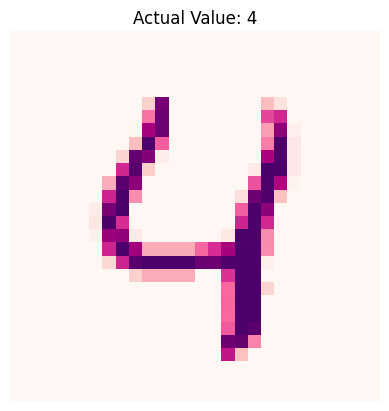

In [36]:
plt.imshow(x_test[4],cmap='RdPu')
plt.title('Actual Value: {}'.format(y_test[4]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[4]))
if(y_test[4]==(np.argmax(prediction[4]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

# Thank You...